### Pablo Veloz M
## Desafío - Boosting Classifiers

__Ejercicio 1: Preprocesamiento__
- Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
- En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo. Algunas normas a seguir:
    - Para las variables categóricas, recodifíquelas en variables binarias.
    - Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.

In [218]:
import aux_funciones as auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error, median_absolute_error, r2_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

__Importando archivos csv Train y Test__

In [219]:
#X_test= pd.read_csv('./Apoyo Desafío/')
X_train= pd.read_csv('./Apoyo Desafío/churn_train.csv')
#y_train= pd.read_csv('./Apoyo Desafío/')
y_test= pd.read_csv('./Apoyo Desafío/churn_test.csv')

In [220]:
df=X_train
df.shape

(3333, 21)

In [221]:
df2=y_test
df2.shape

(1667, 21)

In [222]:
print(df.isnull().sum())

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [223]:
df = df.drop('Unnamed: 0', axis = 1)
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [224]:
df2 = df2.drop('Unnamed: 0', axis = 1)
df2.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [225]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [226]:
listado_object=[]
listado_non_object=[]
for i in df.columns:
    if df[i].dtype=='O':
        listado_object.append(i)
    else:
        listado_non_object.append(i)
print("cantidad de columnas object ",len(listado_object))
print("cantidad de columnas non object ",len(listado_non_object))

cantidad de columnas object  5
cantidad de columnas non object  15


In [227]:
df_object=df.select_dtypes('object')

In [230]:
df_object=df_object.drop(columns='churn',axis=1)

__Creando un nuevo dataframe df_dummies, considerando df y las columnas dtype('O') en dummy__

In [15]:
df_dummies = pd.get_dummies(df, drop_first=True, columns=listado_object)
df_dummies.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,1,0,0,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,1,0,0,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,1,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,0,1,0,0


In [46]:
df2_dummies = pd.get_dummies(df2, drop_first=True, columns=listado_object)
df2_dummies.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,...,0,0,0,0,0,0,1,0,0,0
1,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,...,0,0,0,0,0,0,1,0,0,0
2,103,29,294.7,95,50.10,237.3,105,20.17,300.3,127,...,0,0,0,0,0,0,0,0,1,0
3,99,0,216.8,123,36.86,126.4,88,10.74,220.6,82,...,0,0,0,0,0,1,0,0,0,0
4,108,0,197.4,78,33.56,124.0,101,10.54,204.5,107,...,0,0,0,0,0,1,0,0,0,0


__Graficando las variables numéricas "nativas"__

In [16]:
df_numeric=df.select_dtypes(include=[np.float64,np.int64])
df_numeric.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

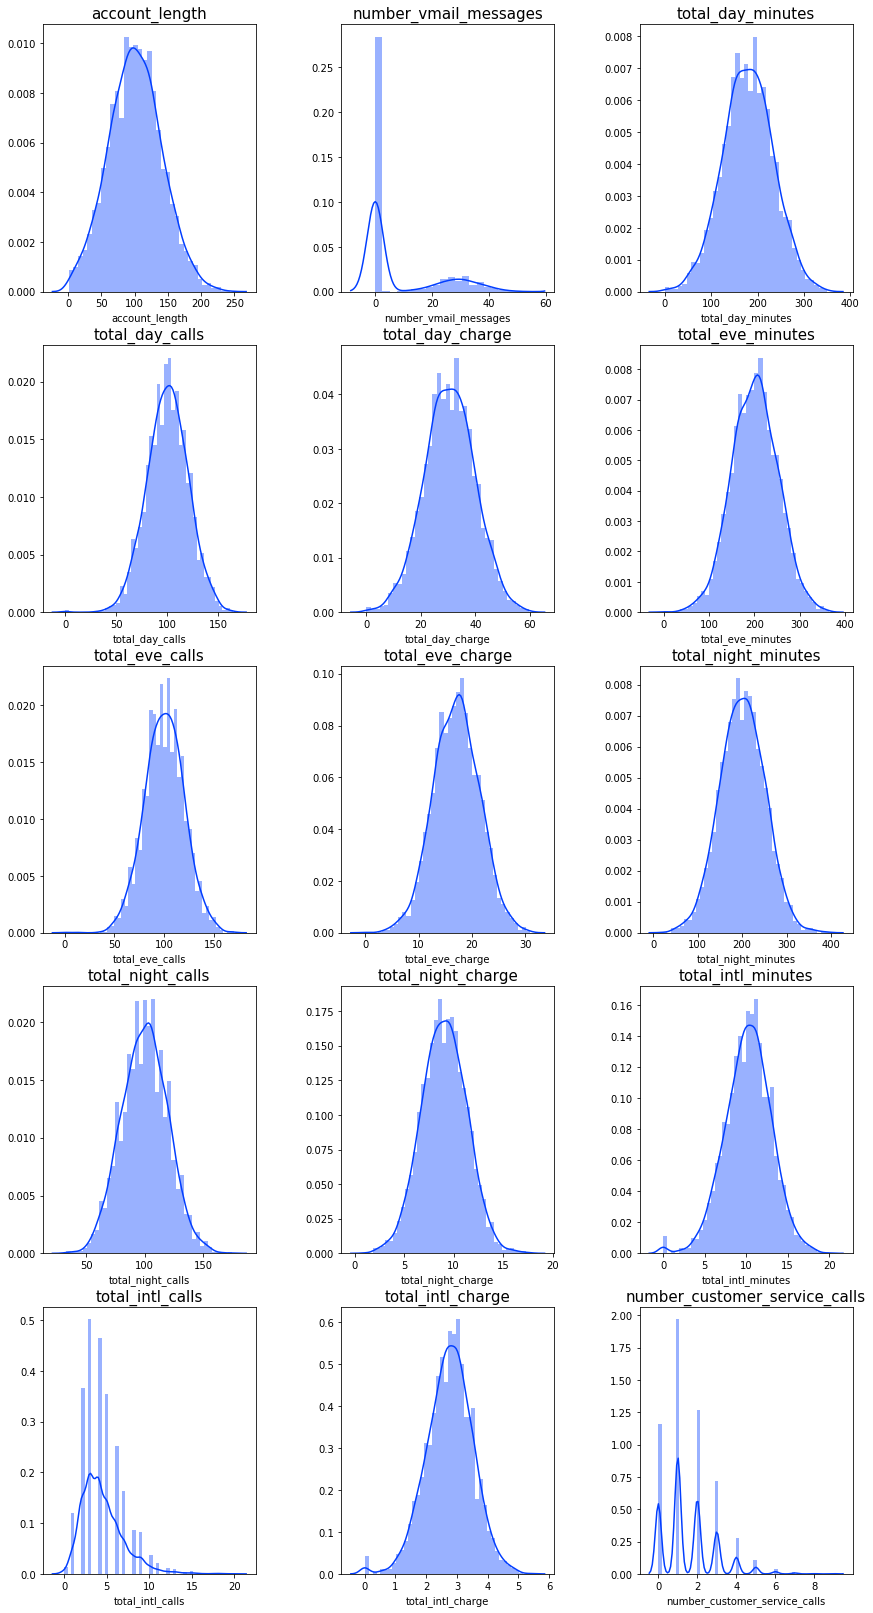

In [17]:
auxiliares.distplot_num(df_dummies,df_numeric.columns,"churn")

In [232]:
df_object_dummies = pd.get_dummies(df_object, drop_first=True)
df_object_dummies.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


__Graficando las variables Categóricas "nativas"__

In [261]:
def distplot_num(dataframe,lista,target):
    var=lista
    fig = plt.figure()
    plt.subplots_adjust(wspace=0.5,right = 2.1,bottom = -7.5)
    for i,n in enumerate(var):
        if n!=target:
            plt.subplot(9,6,i+1)
            ax=sns.countplot(dataframe[n])
            plt.title(n,fontsize=10)
            sns.set_palette("bright")
            ax.set_ylabel('')    
            ax.set_xlabel('')

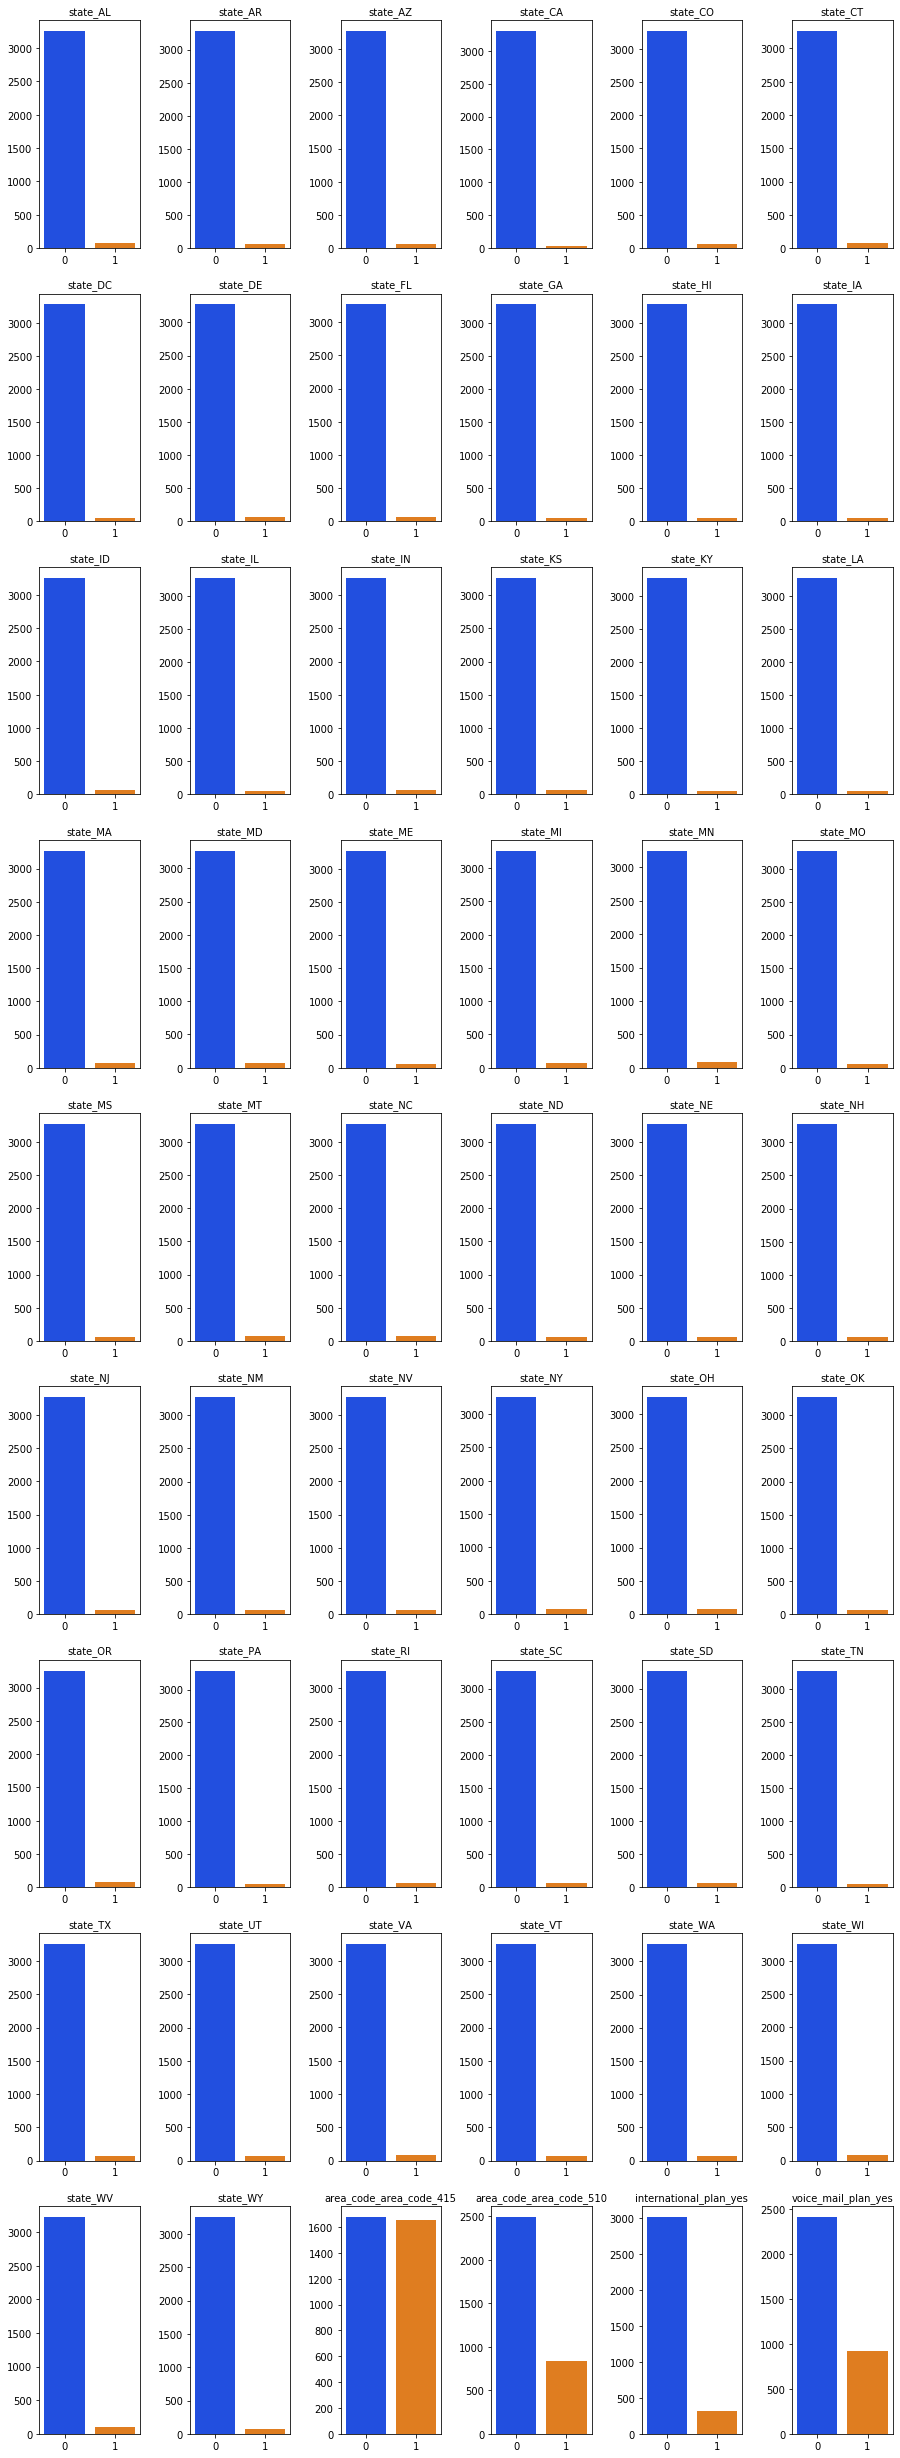

In [262]:
distplot_num(df_object_dummies,df_object_dummies.columns,"churn")

__Explorando variable Objetivo churn_yes__

In [264]:
print(df_dummies['churn_yes'].value_counts('%'))

0    0.855086
1    0.144914
Name: churn_yes, dtype: float64


Text(0.5, 0, '')

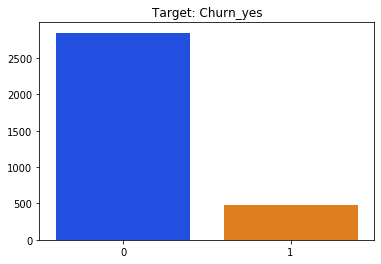

In [266]:
ax=sns.countplot(df_dummies['churn_yes'])
plt.title("Target: Churn_yes")
ax.set_ylabel('')    
ax.set_xlabel('')

__Ejercicio 2: Comparación de AdaBoost y Gradient Boosting__
- Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:
Modelo:AdaBoostClassifierGrilla
{'learning_rate': [0.01, 0.1, 0.5],
'n_estimators': [50, 100, 500, 1000, 2000]}
Modelo:GradientBoostingClassifier{'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1,0.5,0.9]}

__Hiperparámetros__

In [48]:
param_grid_ab = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000]}
param_grid_gb = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1,0.5,0.9]}

__Estandarizando__

In [50]:
X_train=df_dummies.drop('churn_yes',axis=1)
y_train=df_dummies['churn_yes']
X_test=df2_dummies.drop('churn_yes',axis=1)
y_test=df2_dummies['churn_yes']
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [53]:
X_test.shape

(1667, 69)

__Modelo AdaBoost__

In [51]:
ab_grid = GridSearchCV(AdaBoostClassifier(random_state = 1),param_grid = param_grid_ab).fit(X_train, y_train)

__Modelo Gradient Boosting__

In [54]:
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state = 1),param_grid = param_grid_gb).fit(X_train, y_train)

__Predict AdaBoost__

In [52]:
yhat_ab=ab_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, yhat_ab))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1443
           1       0.68      0.31      0.42       224

    accuracy                           0.89      1667
   macro avg       0.79      0.64      0.68      1667
weighted avg       0.87      0.89      0.87      1667



__Predict Gradient Boosting__

In [55]:
yhat_gb=gb_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, yhat_gb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1443
           1       0.90      0.70      0.78       224

    accuracy                           0.95      1667
   macro avg       0.93      0.84      0.88      1667
weighted avg       0.95      0.95      0.95      1667



__Análisis__
- Comparando tanto las métricas generas y por las clases 0 y 1. El modelo realizado con Gradiend Boosting, es mejor en todos sus resultados.


__Ejercicio 3: Principales factores asociados__
- Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.
    - tip: Pueden implementar la función plot_importance que se encuentra en la lectura de Bagging y Random Forest.

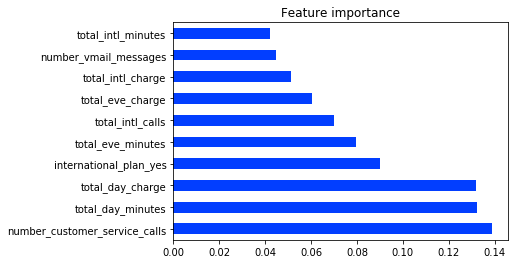

In [63]:
important_features=auxiliares.plot_importance(gb_grid.best_estimator_,X_mat.columns)


__Ejercicio 4: Probabilidad de fuga__
- El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. 
- Para ello, identifique los tres estados con una mayor probabilidad de fuga.
- Implemente el modelo predictivo con el archivo churn_test.csv .
- Recuerde que para obtener la probabilidad de clase, debe utilizar la función predict_proba del modelo.

In [133]:
#gb_grid.best_estimator_.predict_proba(X_test)
tmp_pr=gb_grid.best_estimator_.predict_proba(X_test)
predicted_proba=X_test.filter(regex='state_',axis=1)

In [134]:
predicted_proba["pr_0"]=[i[0] for i in tmp_pr]
predicted_proba["pr_1"]=[i[1] for i in tmp_pr]

In [207]:
predicted_proba.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,pr_0,pr_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.995707,0.004293
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.985896,0.014104
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.844773,0.155227
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.992264,0.007736
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.996418,0.003582


In [208]:
diccio={}
for n,i in predicted_proba.iteritems():
    diccio[n]=predicted_proba[predicted_proba[n]==1]["pr_1"].mean()

In [209]:
states=[]
probab=[]
import operator
diccio_ordenado=sorted(diccio.items(),key=operator.itemgetter(1),reverse=True)
for i in diccio_ordenado[:3]:
    states.append(i[0])
    probab.append(i[1])

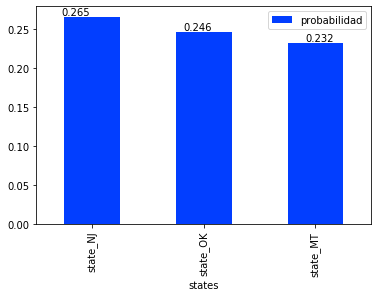

In [321]:
df = pd.DataFrame({'states':states, 'probabilidad':probab})
#ax=df.plot.bar(x='states', y='probabilidad', rot=0)
ax = df.plot(kind='bar',x='states', y='probabilidad') 
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), ((p.get_x() * 1.089), p.get_height() * 1.009))

__Analisis__
- Los tres primeros estados con mayor probabilidad de fuga corresponden a:
    - Nj
    - OK
    - MT